In [3]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
pip install pandas

In [ ]:
!pip install torch pandas transformers datasets trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.6 MB/s eta 0:00:00


In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1


In [2]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, DataCollatorForLanguageModeling
from trl import SFTTrainer

# Load CSV
data_df = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/ai2d_caption_test.csv")
data_df = data_df[:50]
data_df["caption"] = data_df[["entities", "relationships"]].apply(
    lambda x: f"###Entities: {x['entities']}\n###Relationship: {x['relationships']}",
    axis=1
)

# Convert to HuggingFace Dataset
data = Dataset.from_pandas(data_df)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Define training arguments
training_arguments = TrainingArguments(
    output_dir="./mistral-finetuned-alpaca",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=1,
    learning_rate=2e-4,
    lr_scheduler_type="cosine",
    save_strategy="epoch",
    logging_steps=100,
    num_train_epochs=1,
    max_steps=200,
    fp16=True,
    push_to_hub=False
)

# Custom processing function to tokenize the dataset
def process_data(examples):
    return tokenizer(examples['caption'], truncation=True, padding='max_length', max_length=512)

# Apply the processing function to the dataset
data = data.map(process_data, batched=True)

# Data collator for dynamic padding
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Trainer setup
trainer = SFTTrainer(
    model=model,
    train_dataset=data,
    args=training_arguments,
    data_collator=data_collator,
)

# Train the model
trainer.train()

ModuleNotFoundError: No module named 'trl'

In [ ]:
data_df.head()

,image,entities,topic,layout,relationships,caption
0,1597.png,"{'I0': {'id': 'I0', 'type': 'object', 'bounds'...",engineering,circular,"['T1 labels I1', 'T2 labels I2', 'I0 connects ...","###Entities: {'I0': {'id': 'I0', 'type': 'obje..."
1,1560.png,"{'I0': {'id': 'I0', 'type': 'object', 'bounds'...",engineering,circular,"['I0 connects to I1', 'I1 connects to I2', 'I2...","###Entities: {'I0': {'id': 'I0', 'type': 'obje..."
2,1611.png,"{'I0': {'id': 'I0', 'type': 'object', 'bounds'...",engineering,circular,"['I3 connects to I0', 'I2 connects to I3', 'I0...","###Entities: {'I0': {'id': 'I0', 'type': 'obje..."
3,1662.png,"{'I0': {'id': 'I0', 'type': 'object', 'bounds'...",astronomy,rows,"['T1 labels I1', 'T2 labels I2', 'T0 labels I0']","###Entities: {'I0': {'id': 'I0', 'type': 'obje..."
4,734.png,"{'I0': {'id': 'I0', 'type': 'object', 'bounds'...",astronomy,rows,"['T1 labels I1', 'T0 labels I0']","###Entities: {'I0': {'id': 'I0', 'type': 'obje..."


In [ ]:
# prompt: Using dataframe data_df: show topics part in detail

import ast

# Convert the 'entities' column from string to dictionary
data_df['entities'] = data_df['entities'].apply(ast.literal_eval)

# Function to extract detailed topic information
def detailed_topic_info(row):
    entities = row['entities']
    topic = row['topic']

    details = f"Topic: {topic}\n"
    for entity_id, entity_data in entities.items():
        details += f"  Entity ID: {entity_id}, Type: {entity_data['type']}, Label: {entity_data['label']}, Bounds: {entity_data['bounds']}\n"

    return details

# Apply the function to create the new column with detailed information
data_df['detailed_topic_info'] = data_df.apply(detailed_topic_info, axis=1)

# Display the first few rows to see the result
data_df[['topic', 'detailed_topic_info']].head()


,topic,detailed_topic_info
0,engineering,"Topic: engineering\n Entity ID: I0, Type: obj..."
1,engineering,"Topic: engineering\n Entity ID: I0, Type: obj..."
2,engineering,"Topic: engineering\n Entity ID: I0, Type: obj..."
3,astronomy,"Topic: astronomy\n Entity ID: I0, Type: objec..."
4,astronomy,"Topic: astronomy\n Entity ID: I0, Type: objec..."


In [ ]:
import pandas as pd

# Load the dataset
data_df = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/ai2d_caption_test.csv")

def check_dataset(question):
    """
    Check if the question exists in the 'caption' column and return entities and relationships.
    Args:
        question (str): The user-provided question.
    Returns:
        dict or None: Entities and relationships if found; None otherwise.
    """
    # Strip any leading/trailing spaces from the question
    question = question.strip()

    # Search for the user input in the 'caption' column (case-insensitive)
    matching_row = data_df[data_df["caption"].str.contains(question, case=False, na=False)]

    # Check if a matching row is found
    if not matching_row.empty:
        # Access the first matching row (using iloc[0] instead of iloc[1] or iloc[4])
        return {
            "entities": matching_row.iloc[0]["entities"],
            "relationships": matching_row.iloc[0]["relationships"],
        }
    return None

def main():
    """
    Main function to handle user input and provide entities and relationships.
    """
    while True:
        # Take user input
        question = input("\nEnter your question (or 'exit' to quit): ").strip()
        if question.lower() == "exit":
            print("Goodbye!")
            break

        # Check the dataset for entities and relationships
        result = check_dataset(question)
        if result:
            print(f"\nMatch Found!\nEntities: {result['entities']}\nRelationships: {result['relationships']}")
        else:
            print("\nNo match found in the dataset.")

if __name__ == "__main__":
    main()



Enter your question (or 'exit' to quit): A diagram showing a series of three lights side by side, connected to each other. The left most light and right most light is also connected to a battery.

Match Found!
Entities: {'I0': {'id': 'I0', 'type': 'object', 'bounds': [9, 1, 26, 40], 'label': 'light bulb'}, 'I1': {'id': 'I1', 'type': 'object', 'bounds': [40, 2, 55, 40], 'label': 'light bulb'}, 'I2': {'id': 'I2', 'type': 'object', 'bounds': [70, 2, 84, 37], 'label': 'light bulb'}, 'I3': {'id': 'I3', 'type': 'object', 'bounds': [70, 61, 99, 97], 'label': 'battery'}}
Relationships: ['I3 connects to I0', 'I2 connects to I3', 'I0 connects to I1', 'I1 connects to I2']

Enter your question (or 'exit' to quit): exit
Goodbye!


In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(response):
    """
    Generalized entity and relationship extraction using spaCy.
    Args:
        response (str): The input text.
    Returns:
        tuple: Contains lists of 'entities' and 'relationships'.
    """
    # Process the text with spaCy
    doc = nlp(response)

    # Extract entities (nouns and noun phrases)
    entities = []
    for chunk in doc.noun_chunks:
        entities.append({"label": chunk.text.strip(), "type": "object"})

    print("Extracted Entities:")
    print(entities)  # Debugging line

    # Extract relationships (verbs and linking phrases between entities)
    relationships = []
    for token in doc:
        if token.pos_ == "VERB":  # Look for verbs connecting entities
            subject = [w.text for w in token.lefts if w.dep_ == "nsubj"]
            obj = [w.text for w in token.rights if w.dep_ == "dobj"]
            if subject and obj:
                relationships.append({
                    "source": subject[0],
                    "target": obj[0],
                    "label": token.text,
                })

    print("Extracted Relationships:")
    print(relationships)  # Debugging line

    return entities, relationships


def format_output(entities, relationships):
    """
    Convert extracted entities and relationships into the required structured format.
    Args:
        entities (list): List of extracted entities.
        relationships (list): List of extracted relationships.
    Returns:
        dict: Structured output in the desired format.
    """
    output = {}

    # Example bounds for demonstration purposes (these should be dynamically generated or provided)
    bounds_template = {"I": [0, 0, 50, 50], "T": [0, 0, 50, 50]}

    # Add entities to the output
    for i, entity in enumerate(entities):
        key = f"I{i}" if "object" in entity["type"] else f"T{i}"
        output[key] = {
            "id": key,
            "type": entity["type"],
            "bounds": bounds_template[key[0]],
            "label": entity["label"],
        }

    # Add relationships (assuming directional relationships)
    for i, relationship in enumerate(relationships):
        key = f"R{i}"
        output[key] = {
            "source": relationship["source"],
            "target": relationship["target"],
            "label": relationship["label"],
        }

    return output


def process_input(input_text):
    """
    Process the input text to generate the desired output format.
    Args:
        input_text (str): Input diagram description or response text.
    Returns:
        dict: Extracted and formatted data.
    """
    # Extract entities and relationships
    entities, relationships = extract_entities_and_relationships(input_text)

    # If no entities or relationships, return an empty dict
    if not entities and not relationships:
        print("No entities or relationships found.")
        return {}

    # Format the output into the required JSON structure
    structured_output = format_output(entities, relationships)
    return structured_output


def main():
    """
    Main function to process user input and generate the desired output.
    """
    print("Enter the diagram description or text input. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break

        # Process the input and generate structured output
        try:
            structured_output = process_input(user_input)
            print("\nGenerated Structured Output:")
            print(structured_output)
        except Exception as e:
            print(f"Error: {e}")


if __name__ == "__main__":
    main()


Enter the diagram description or text input. Type 'exit' to quit.

Input: A grasshopper is eaten by frog.
Extracted Entities:
[{'label': 'A grasshopper', 'type': 'object'}, {'label': 'frog', 'type': 'object'}]
Extracted Relationships:
[]

Generated Structured Output:
{'I0': {'id': 'I0', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'A grasshopper'}, 'I1': {'id': 'I1', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'frog'}}

Input: exit
Goodbye!


In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(response):
    """
    Generalized entity and relationship extraction using spaCy.
    Args:
        response (str): The input text.
    Returns:
        tuple: Contains lists of 'entities' and 'relationships'.
    """
    # Process the text with spaCy
    doc = nlp(response)

    # Extract entities (nouns and noun phrases)
    entities = []
    for chunk in doc.noun_chunks:
        entities.append({"label": chunk.text.strip(), "type": "object"})

    print("Extracted Entities:")
    print(entities)  # Debugging line

    # Extract relationships (verbs and linking phrases between entities)
    relationships = []
    for token in doc:
        if token.pos_ == "VERB":  # Look for verbs connecting entities
            subject = [w.text for w in token.lefts if w.dep_ == "nsubj"]
            obj = [w.text for w in token.rights if w.dep_ == "dobj"]
            if subject and obj:
                relationships.append({
                    "source": subject[0],
                    "target": obj[0],
                    "label": token.text,
                })

    print("Extracted Relationships:")
    print(relationships)  # Debugging line

    return entities, relationships

def filter_entities_and_relationships(entities, relationships):
    """
    Filter out irrelevant entities and relationships.
    Args:
        entities (list): List of extracted entities.
        relationships (list): List of extracted relationships.
    Returns:
        tuple: Filtered lists of 'entities' and 'relationships'.
    """
    # Define irrelevant terms (customize this list as needed)
    irrelevant_terms = ["example", "something", "anything", "nothing"]

    # Filter entities
    filtered_entities = [entity for entity in entities if entity["label"].lower() not in irrelevant_terms]

    # Filter relationships
    filtered_relationships = [rel for rel in relationships if rel["label"].lower() not in irrelevant_terms]

    return filtered_entities, filtered_relationships

def format_output(entities, relationships):
    """
    Convert extracted entities and relationships into the required structured format.
    Args:
        entities (list): List of extracted entities.
        relationships (list): List of extracted relationships.
    Returns:
        dict: Structured output in the desired format.
    """
    output = {}

    # Example bounds for demonstration purposes (these should be dynamically generated or provided)
    bounds_template = {"I": [0, 0, 50, 50], "T": [0, 0, 50, 50]}

    # Add entities to the output
    for i, entity in enumerate(entities):
        key = f"I{i}" if "object" in entity["type"] else f"T{i}"
        output[key] = {
            "id": key,
            "type": entity["type"],
            "bounds": bounds_template[key[0]],
            "label": entity["label"],
        }

    # Add relationships (assuming directional relationships)
    for i, relationship in enumerate(relationships):
        key = f"R{i}"
        output[key] = {
            "source": relationship["source"],
            "target": relationship["target"],
            "label": relationship["label"],
        }

    return output

def process_input(input_text):
    """
    Process the input text to generate the desired output format.
    Args:
        input_text (str): Input diagram description or response text.
    Returns:
        dict: Extracted and formatted data.
    """
    # Extract entities and relationships
    entities, relationships = extract_entities_and_relationships(input_text)

    # Filter out irrelevant entities and relationships
    filtered_entities, filtered_relationships = filter_entities_and_relationships(entities, relationships)

    # If no entities or relationships, return an empty dict
    if not filtered_entities and not filtered_relationships:
        print("No relevant entities or relationships found.")
        return {}

    # Format the output into the required JSON structure
    structured_output = format_output(filtered_entities, filtered_relationships)
    return structured_output

def main():
    """
    Main function to process user input and generate the desired output.
    """
    print("Enter the diagram description or text input. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break

        # Process the input and generate structured output
        try:
            structured_output = process_input(user_input)
            print("\nGenerated Structured Output:")
            print(structured_output)
        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()

Enter the diagram description or text input. Type 'exit' to quit.

Input: "Start the process by entering your name. Then, validate the input. If the input is valid, proceed to the next step; otherwise, display an error message. Finally, save the data and end the process."
Extracted Entities:
[{'label': 'the process', 'type': 'object'}, {'label': 'your name', 'type': 'object'}, {'label': 'the input', 'type': 'object'}, {'label': 'the input', 'type': 'object'}, {'label': 'the next step', 'type': 'object'}, {'label': 'an error message', 'type': 'object'}, {'label': 'the data', 'type': 'object'}, {'label': 'the process', 'type': 'object'}]
Extracted Relationships:
[]

Generated Structured Output:
{'I0': {'id': 'I0', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'the process'}, 'I1': {'id': 'I1', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'your name'}, 'I2': {'id': 'I2', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'the input'}, 'I3': {'id': 'I3', 'type': 'object', 

Removing the useless

In [ ]:
import spacy

def extract_entities_and_relationships(response):
    """
    Extracts entities and relationships from input text using spaCy.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(response)

    entities = []
    for chunk in doc.noun_chunks:
        entities.append({"label": chunk.text.strip(), "type": "object"})

    relationships = []
    for token in doc:
        if token.pos_ == "VERB":
            subject = [w.text for w in token.lefts if w.dep_ == "nsubj"]
            obj = [w.text for w in token.rights if w.dep_ == "dobj"]
            if subject and obj:
                relationships.append({"source": subject[0], "target": obj[0], "label": token.text})

    return filter_relevant_entities(entities, relationships)

def filter_relevant_entities(entities, relationships):
    """
    Filters out unwanted entities and relationships for flowchart generation.
    """
    unwanted_entity_labels = {"some", "thing", "object", "word", "it", "that"}
    unwanted_relations = {"is", "has", "includes", "contains", "relates to", "associated with", "exists", "belongs to"}

    filtered_entities = [e for e in entities if e["label"].lower() not in unwanted_entity_labels]
    filtered_relationships = [r for r in relationships if r["label"].lower() not in unwanted_relations]

    return filtered_entities, filtered_relationships

def process_input(input_text):
    """
    Processes user input and generates structured output.
    """
    entities, relationships = extract_entities_and_relationships(input_text)
    if not entities and not relationships:
        return {}
    return format_output(entities, relationships)

def format_output(entities, relationships):
    """
    Converts extracted entities and relationships into a structured format.
    """
    output = {}
    bounds_template = {"I": [0, 0, 50, 50], "T": [0, 0, 50, 50]}

    for i, entity in enumerate(entities):
        key = f"I{i}" if "object" in entity["type"] else f"T{i}"
        output[key] = {"id": key, "type": entity["type"], "bounds": bounds_template[key[0]], "label": entity["label"]}

    for i, relationship in enumerate(relationships):
        key = f"R{i}"
        output[key] = {"source": relationship["source"], "target": relationship["target"], "label": relationship["label"]}

    return output

def main():
    """
    Main function to handle user input and provide structured output.
    """
    print("Enter diagram description. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        try:
            structured_output = process_input(user_input)
            print("\nGenerated Structured Output:", structured_output)
        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter diagram description. Type 'exit' to quit.

Input: "A student submits an assignment. The teacher reviews the assignment and provides feedback."

Generated Structured Output: {'I0': {'id': 'I0', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'A student'}, 'I1': {'id': 'I1', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'an assignment'}, 'I2': {'id': 'I2', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'The teacher'}, 'I3': {'id': 'I3', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'the assignment'}, 'I4': {'id': 'I4', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'feedback'}, 'R0': {'source': 'student', 'target': 'assignment', 'label': 'submits'}, 'R1': {'source': 'teacher', 'target': 'assignment', 'label': 'reviews'}}

Input: exit
Goodbye!


In [ ]:
import spacy
import graphviz

def extract_entities_and_relationships(response):
    """
    Extracts entities and relationships from input text using spaCy.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(response)

    entities = []
    for chunk in doc.noun_chunks:
        entities.append({"label": chunk.text.strip(), "type": "object"})

    relationships = []
    for token in doc:
        if token.pos_ == "VERB":
            subject = [w.text for w in token.lefts if w.dep_ == "nsubj"]
            obj = [w.text for w in token.rights if w.dep_ == "dobj"]
            if subject and obj:
                relationships.append({"source": subject[0], "target": obj[0], "label": token.text})

    return filter_relevant_entities(entities, relationships)

def filter_relevant_entities(entities, relationships):
    """
    Filters out unwanted entities and relationships for flowchart generation.
    """
    unwanted_entity_labels = {"some", "thing", "object", "word", "it", "that"}
    unwanted_relations = {"is", "has", "includes", "contains", "relates to", "associated with", "exists", "belongs to"}

    filtered_entities = [e for e in entities if e["label"].lower() not in unwanted_entity_labels]
    filtered_relationships = [r for r in relationships if r["label"].lower() not in unwanted_relations]

    return filtered_entities, filtered_relationships

def process_input(input_text):
    """
    Processes user input and generates structured output.
    """
    entities, relationships = extract_entities_and_relationships(input_text)
    if not entities and not relationships:
        return {}

    structured_output = format_output(entities, relationships)
    generate_flowchart(structured_output)

    return structured_output

def format_output(entities, relationships):
    """
    Converts extracted entities and relationships into a structured format.
    """
    output = {}
    bounds_template = {"I": [0, 0, 50, 50], "T": [0, 0, 50, 50]}

    for i, entity in enumerate(entities):
        key = f"I{i}" if "object" in entity["type"] else f"T{i}"
        output[key] = {"id": key, "type": entity["type"], "bounds": bounds_template[key[0]], "label": entity["label"]}

    for i, relationship in enumerate(relationships):
        key = f"R{i}"
        output[key] = {"source": relationship["source"], "target": relationship["target"], "label": relationship["label"]}

    return output

def generate_flowchart(data):
    """
    Generates a flowchart from extracted entities and relationships using Graphviz.
    """
    dot = graphviz.Digraph(format="png")

    # Add nodes
    for key, value in data.items():
        if key.startswith("I"):  # It's an entity
            dot.node(value["id"], value["label"], shape="box", style="filled", fillcolor="lightblue")

    # Add edges (relationships)
    for key, value in data.items():
        if key.startswith("R"):  # It's a relationship
            dot.edge(value["source"], value["target"], label=value["label"])

    # Render and display the graph
    dot.render("flowchart_output", view=True)  # Saves as flowchart_output.png and opens the image

def main():
    """
    Main function to handle user input and generate structured output + flowchart.
    """
    print("Enter diagram description. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        try:
            structured_output = process_input(user_input)
            print("\nGenerated Structured Output:", structured_output)
        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter diagram description. Type 'exit' to quit.

Input: A grasshopper is eaten by frog.

Generated Structured Output: {'I0': {'id': 'I0', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'A grasshopper'}, 'I1': {'id': 'I1', 'type': 'object', 'bounds': [0, 0, 50, 50], 'label': 'frog'}}

Input: exit
Goodbye!


FLOWCHART

In [ ]:
import spacy
import graphviz

def extract_entities_and_relationships(response):
    """
    Extracts entities and relationships from input text using spaCy.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(response)

    entities = []
    for chunk in doc.noun_chunks:
        entities.append({"label": chunk.text.strip(), "type": "object"})

    relationships = []
    for token in doc:
        if token.pos_ == "VERB":
            subject = [w.text for w in token.lefts if w.dep_ == "nsubj"]
            obj = [w.text for w in token.rights if w.dep_ == "dobj"]
            if subject and obj:
                relationships.append({"source": subject[0], "target": obj[0], "label": token.text})

    return filter_relevant_entities(entities, relationships)

def filter_relevant_entities(entities, relationships):
    """
    Filters out unwanted entities and relationships for flowchart generation.
    """
    unwanted_entity_labels = {"some", "thing", "object", "word", "it", "that"}
    unwanted_relations = {"is", "has", "includes", "contains", "relates to", "associated with", "exists", "belongs to"}

    filtered_entities = [e for e in entities if e["label"].lower() not in unwanted_entity_labels]
    filtered_relationships = [r for r in relationships if r["label"].lower() not in unwanted_relations]

    return filtered_entities, filtered_relationships

def process_input(input_text):
    """
    Processes user input and generates structured output + flowchart.
    """
    entities, relationships = extract_entities_and_relationships(input_text)
    if not entities and not relationships:
        return {}

    structured_output = format_output(entities, relationships)
    generate_flowchart(structured_output)

    return structured_output

def format_output(entities, relationships):
    """
    Converts extracted entities and relationships into a structured format.
    """
    output = {}

    for i, entity in enumerate(entities):
        key = f"I{i}"
        output[key] = {"id": key, "label": entity["label"], "shape": "rectangle"}

    for i, relationship in enumerate(relationships):
        key = f"R{i}"
        output[key] = {"source": relationship["source"], "target": relationship["target"], "label": relationship["label"]}

    return output

def generate_flowchart(data):
    """
    Generates a structured flowchart using Graphviz.
    """
    dot = graphviz.Digraph(format="png")

    # Add nodes with proper shapes
    for key, value in data.items():
        if key.startswith("I"):  # It's an entity
            dot.node(value["id"], value["label"], shape="box", style="filled", fillcolor="lightblue")

    # Add edges (relationships)
    for key, value in data.items():
        if key.startswith("R"):  # It's a relationship
            dot.edge(value["source"], value["target"], label=value["label"], dir="forward")

    # Save and display the flowchart
    dot.render("flowchart_output", view=True)  # Generates flowchart_output.png

def main():
    """
    Main function to handle user input and generate structured output + flowchart.
    """
    print("Enter diagram description. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        try:
            structured_output = process_input(user_input)
            print("\nGenerated Structured Output:", structured_output)
        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter diagram description. Type 'exit' to quit.

Input: A grasshopper is eaten by frog.

Generated Structured Output: {'I0': {'id': 'I0', 'label': 'A grasshopper', 'shape': 'rectangle'}, 'I1': {'id': 'I1', 'label': 'frog', 'shape': 'rectangle'}}

Input: exit
Goodbye!


Enter diagram description. Type 'exit' to quit.

Input:  Grasshopper is killed by frog. Frog is killed by snake. Snake by Eagle.


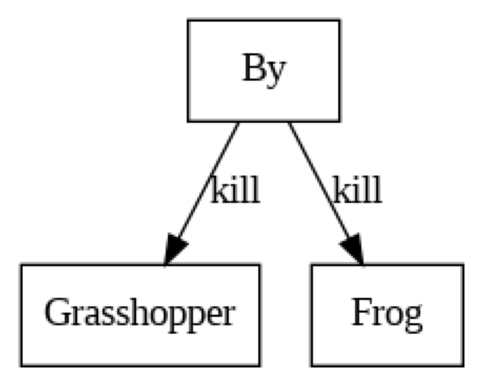

KeyboardInterrupt: Interrupted by user


Input: exit


In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def extract_entities_and_relationships(response):
    """
    Extracts entities and relationships from input text using spaCy.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(response)

    entities = set()  # Avoid duplicates
    relationships = []

    for token in doc:
        # Look for passive sentence structure (agent and subject)
        if token.dep_ == "ROOT" and token.pos_ == "VERB":
            subject = None
            agent = None

            # Check for subject (who is being acted upon)
            for child in token.children:
                if child.dep_ in {"nsubjpass"}:
                    subject = child.text.capitalize()
                elif child.dep_ in {"agent"}:
                    agent = child.text.capitalize()

            # If passive structure is found
            if subject and agent:
                relationships.append({"source": agent, "target": subject, "label": token.lemma_})
                entities.add(subject)
                entities.add(agent)

    return list(entities), relationships

def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart image from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    # Add entities as nodes
    for entity in entities:
        dot.node(entity, shape="rectangle")

    # Add relationships as directed edges
    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"])

    # Save and render the flowchart
    filepath = dot.render(filename)
    return filepath

def display_flowchart(image_path):
    """
    Displays the generated flowchart image in a pop-up window.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

def main():
    """
    Main function to handle user input and generate a flowchart.
    """
    print("Enter diagram description. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Please check the input format.")
                continue

            # Generate and display flowchart
            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


PASSIVE RELATION

Enter a description to generate a flowchart. Type 'exit' to quit.

Input: lion eats deer
No valid flowchart elements found. Try using clear passive sentence structures.

Input:  Grasshopper is killed by frog. Frog is killed by snake. Snake by Eagle.


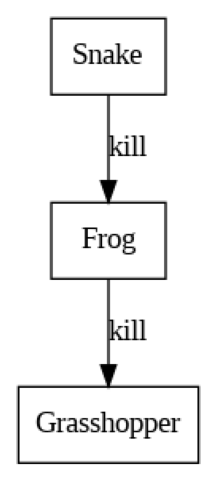


Input: A student submits an assignment. The teacher reviews it and provides feedback.
No valid flowchart elements found. Try using clear passive sentence structures.

Input: The car was repaired by the mechanic. Then, the car was driven by the owner to the service center.


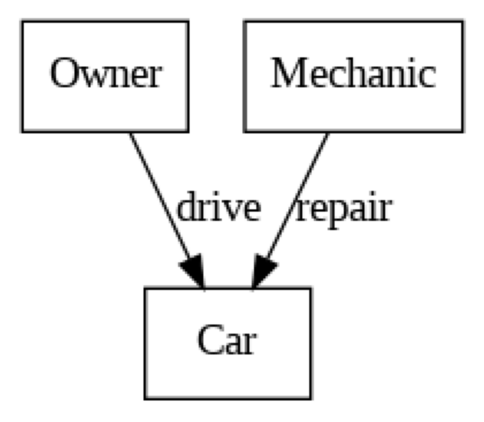


Input: A tree was cut by the woodcutter. The wood was transported to the factory. The factory produces furniture.


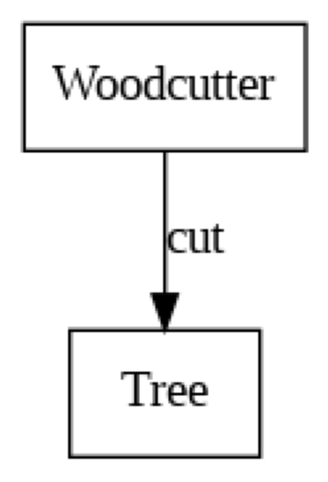


Input: exit
Exiting... Goodbye!


In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extracts entities and their relationships from an input text.
    Supports general sentences containing passive structures like 'X is done by Y'.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        agent = None
        verb = None

        for token in sent:
            # Identify passive sentence structure
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_

            elif token.dep_ == "nsubjpass":  # Subject in passive sentence
                subject = token.text.capitalize()

            elif token.dep_ == "agent":  # The agent (doer) of the action
                for child in token.children:
                    if child.dep_ == "pobj":  # Object of "by"
                        agent = child.text.capitalize()

        if subject and agent and verb:
            entities.add(subject)
            entities.add(agent)
            relationships.append({"source": agent, "target": subject, "label": verb})

    return list(entities), relationships

def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart image from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="rectangle")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"])

    filepath = dot.render(filename)
    return filepath

def display_flowchart(image_path):
    """
    Displays the generated flowchart image in a pop-up window.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show(block=False)

def main():
    """
    Main function to handle user input and generate a flowchart dynamically.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear passive sentence structures.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


In [ ]:
import spacy
import graphviz
import os
import subprocess
from PIL import Image

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extracts entities and their relationships from an input text.
    Supports general sentences containing passive structures like 'X is done by Y'.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        agent = None
        verb = None

        for token in sent:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_
            elif token.dep_ == "nsubjpass":
                subject = token.text.capitalize()
            elif token.dep_ == "agent":
                for child in token.children:
                    if child.dep_ == "pobj":
                        agent = child.text.capitalize()

        if subject and agent and verb:
            entities.add(subject)
            entities.add(agent)
            relationships.append({"source": agent, "target": subject, "label": verb})

    return list(entities), relationships

def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart image from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="ellipse", style="filled", color="lightblue")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"], color="red")

    filepath = dot.render(filename)

    # Ensure the file path has the correct extension
    image_path = filepath + ".png" if not filepath.endswith(".png") else filepath
    return image_path

def display_flowchart(image_path):
    """
    Opens the generated flowchart in a separate image viewer window.
    """
    if os.path.exists(image_path):
        if os.name == "nt":  # Windows
            os.startfile(image_path)
        elif os.name == "posix":  # macOS/Linux
            subprocess.run(["xdg-open", image_path])  # Linux
            subprocess.run(["open", image_path])  # macOS
        else:
            img = Image.open(image_path)
            img.show()
    else:
        print("Error: Image file not found!")

def main():
    """
    Main function to handle user input and generate a flowchart dynamically.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")
    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear passive sentence structures.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Enter a description to generate a flowchart. Type 'exit' to quit.

Input: The car was repaired by the mechanic. Then, the car was driven by the owner to the service center.

Input: exit
Exiting... Goodbye!


saving as an image

Enter a description to generate a flowchart. Type 'exit' to quit.

Input: he car was repaired by the mechanic. Then, the car was driven by the owner to the service center.


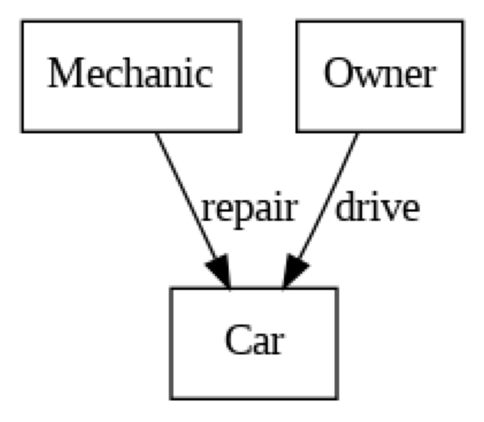


Input: A tree was cut by the woodcutter. The wood was transported to the factory. The factory produces furniture.


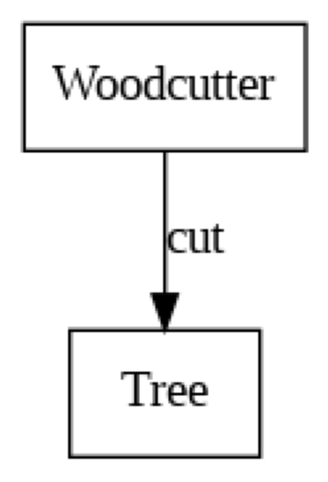


Input: exit
Exiting... Goodbye!


In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extract entities and their relationships from the input text.
    Supports passive sentences like 'X is done by Y'.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        agent = None
        verb = None

        for token in sent:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_
            elif token.dep_ == "nsubjpass":  # Passive subject
                subject = token.text.capitalize()
            elif token.dep_ == "agent":  # Agent (doer)
                for child in token.children:
                    if child.dep_ == "pobj":  # Object of "by"
                        agent = child.text.capitalize()

        if subject and agent and verb:
            entities.add(subject)
            entities.add(agent)
            relationships.append({"source": agent, "target": subject, "label": verb})

    return list(entities), relationships

def generate_flowchart(entities, relationships):
    """
    Generates a flowchart image and saves it temporarily.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="rectangle")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"])

    temp_filepath = "temp_flowchart.png"
    dot.render(temp_filepath, format="png")
    return temp_filepath + ".png"

def display_flowchart(image_path):
    """
    Displays the generated flowchart in a pop-up window.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show(block=False)  # Non-blocking pop-up window

def main():
    """
    Runs an interactive loop to take user input and generate flowcharts.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")

    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear passive sentence structures.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

            # Clean up temp file
            os.remove(image_path)

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


full flowchart

Enter a description to generate a flowchart. Type 'exit' to quit.

Input: The car was repaired by the mechanic. Then, the car was driven by the owner to the service center.


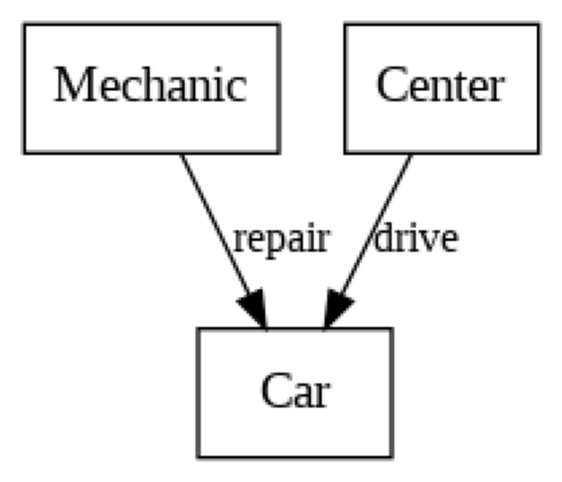


Input: A student submits an assignment. The teacher reviews it and provides feedback.


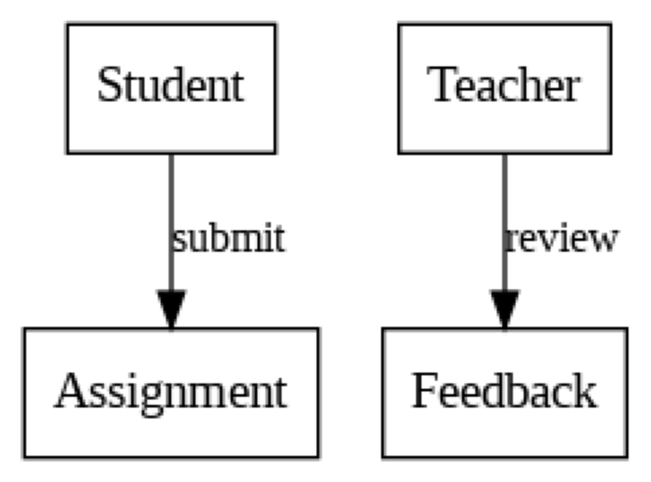


Input: A tree was cut by the woodcutter. The wood was transported to the factory. The factory produces furniture.


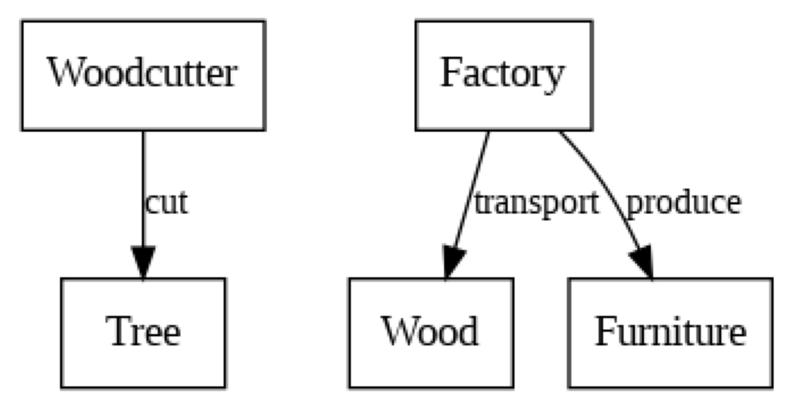


Input: exit
Exiting... Goodbye!


In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extracts subject-verb-object (SVO) relationships while handling passive voice correctly.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        verb = None
        obj = None
        is_passive = False  # Track passive sentences

        for token in sent:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_

            elif token.dep_ in ["nsubj", "nsubjpass"]:  # Subject (active/passive)
                subject = token.text.capitalize()
                if token.dep_ == "nsubjpass":
                    is_passive = True  # Mark sentence as passive

            elif token.dep_ in ["dobj", "attr", "pobj"]:  # Object
                obj = token.text.capitalize()

        # If passive, swap subject & object to maintain correct order
        if is_passive and subject and obj:
            subject, obj = obj, subject

        if subject and verb and obj:
            entities.add(subject)
            entities.add(obj)
            relationships.append({"source": subject, "target": obj, "label": verb})

    return list(entities), relationships

def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="rectangle", fontsize="14")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"], fontsize="12")

    temp_filepath = filename + ".png"
    dot.render(filename, format="png")
    return temp_filepath

def display_flowchart(image_path):
    """
    Displays the generated flowchart in Colab.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def main():
    """
    Runs the input loop to generate flowcharts dynamically.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")

    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear subject-verb-object sentences.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

            os.remove(image_path)  # Clean up temp file

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter a description to generate a flowchart. Type 'exit' to quit.

Input: The car was repaired by the mechanic. Then, the car was driven by the owner to the service center.


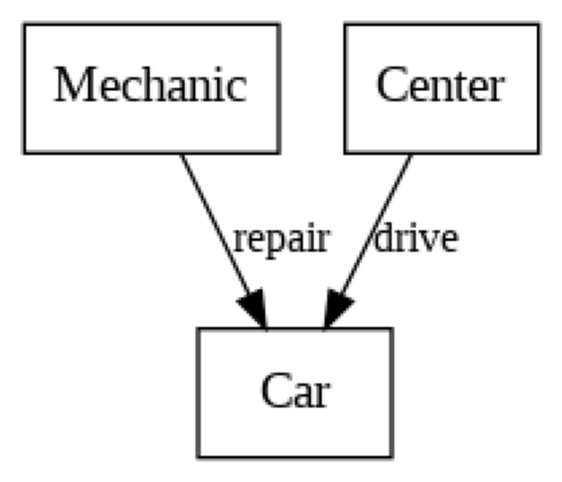

KeyboardInterrupt: Interrupted by user

In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extracts subject-verb-object (SVO) relationships while handling passive voice correctly.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        verb = None
        obj = None
        is_passive = False  # Track passive sentences

        for token in sent:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_

            elif token.dep_ in ["nsubj", "nsubjpass"]:  # Subject (active/passive)
                subject = token.text.capitalize()
                if token.dep_ == "nsubjpass":
                    is_passive = True  # Mark sentence as passive

            elif token.dep_ in ["dobj", "attr", "pobj", "prep"]:  # Object handling more cases
                obj = token.text.capitalize()

        # If passive, swap subject & object to maintain correct order
        if is_passive and subject and obj:
            subject, obj = obj, subject

        if subject and verb and obj:
            entities.add(subject)
            entities.add(obj)
            relationships.append({"source": subject, "target": obj, "label": verb})

    return list(entities), relationships


def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="rectangle", fontsize="14")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"], fontsize="12")

    temp_filepath = filename + ".png"
    dot.render(filename, format="png")
    return temp_filepath


def display_flowchart(image_path):
    """
    Displays the generated flowchart.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


def main():
    """
    Runs the input loop to generate flowcharts dynamically.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")

    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear subject-verb-object sentences.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

            os.remove(image_path)  # Clean up temp file

        except Exception as e:
            print(f"Error: {e}")


if __name__ == "__main__":
    main()

code to flowchart

In [ ]:
import re
import graphviz

def extract_control_flow(code):
    """
    Extracts functions, loops, and conditionals from C++ code using regex.
    """
    control_flow = []

    # Function declarations
    functions = re.findall(r'\b([a-zA-Z_][a-zA-Z0-9_]*)\s*\(', code)
    for func in functions:
        control_flow.append(("FUNCTION", func))

    # Conditionals
    if_statements = re.finditer(r'\bif\s*\((.*?)\)', code)
    for match in if_statements:
        condition = match.group(1).strip()
        control_flow.append(("IF", condition))

    # Loops
    for_loops = re.finditer(r'\bfor\s*\((.*?)\)', code)
    while_loops = re.finditer(r'\bwhile\s*\((.*?)\)', code)

    for match in for_loops:
        condition = match.group(1).strip()
        control_flow.append(("FOR", condition))

    for match in while_loops:
        condition = match.group(1).strip()
        control_flow.append(("WHILE", condition))

    return control_flow

def generate_flowchart(control_flow, filename="flowchart"):
    """
    Generates a flowchart using Graphviz.
    """
    dot = graphviz.Digraph(format="png")
    prev_node = None

    for i, (node_type, label) in enumerate(control_flow):
        node_id = f"node_{i}"
        shape = "box"
        if node_type == "IF":
            shape = "diamond"
        elif node_type == "FUNCTION":
            shape = "ellipse"

        dot.node(node_id, f"{node_type}: {label}", shape=shape)

        if prev_node:
            dot.edge(prev_node, node_id)
        prev_node = node_id

    dot.render(filename, cleanup=True)
    print(f"Flowchart saved as {filename}.png")

# Example C++ Code
cpp_code = """
void printMessage() {
    std::cout << "Hello, World!" << std::endl;
}

int main() {
    int x = 10;
    if (x > 5) {
        std::cout << "x is greater than 5" << std::endl;
    } else {
        std::cout << "x is less than or equal to 5" << std::endl;
    }

    for (int i = 0; i < 3; i++) {
        std::cout << "Iteration: " << i << std::endl;
    }

    printMessage();
    return 0;
}
"""

# Process & Generate Flowchart
control_flow_data = extract_control_flow(cpp_code)
generate_flowchart(control_flow_data)


Flowchart saved as flowchart.png


Flowchart saved as flowchart.png


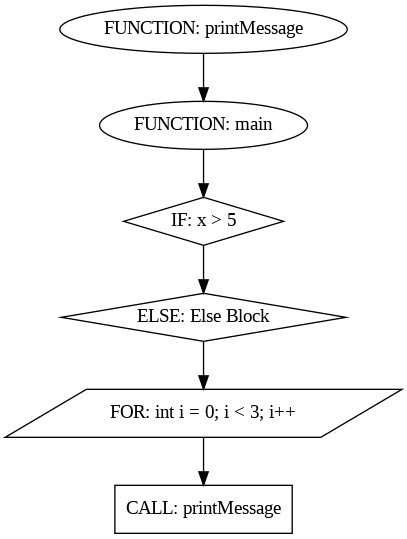

In [ ]:
import re
from graphviz import Digraph
from IPython.display import display, Image

# Define C++ code as a string
cpp_code = """
#include <iostream>

void printMessage() {
    std::cout << "Hello, World!" << std::endl;
}

int main() {
    int x = 10;
    if (x > 5) {
        std::cout << "x is greater than 5" << std::endl;
    } else {
        std::cout << "x is less than or equal to 5" << std::endl;
    }

    for (int i = 0; i < 3; i++) {
        std::cout << "Iteration: " << i << std::endl;
    }

    printMessage();
    return 0;
}
"""

def parse_cpp_code(cpp_code):
    """
    Parse the C++ code string and extract control flow information.
    """
    control_flow = []

    # Match function definitions
    function_pattern = re.compile(r'\b(\w+)\s+(\w+)\s*\(.*\)\s*\{')
    for match in function_pattern.finditer(cpp_code):
        control_flow.append(("FUNCTION", match.group(2)))

    # Match if statements
    if_pattern = re.compile(r'\bif\s*\((.*?)\)')
    for match in if_pattern.finditer(cpp_code):
        control_flow.append(("IF", match.group(1)))

    # Match else statements
    else_pattern = re.compile(r'\belse\s*\{')
    for match in else_pattern.finditer(cpp_code):
        control_flow.append(("ELSE", "Else Block"))

    # Match for loops
    for_pattern = re.compile(r'\bfor\s*\((.*?)\)')
    for match in for_pattern.finditer(cpp_code):
        control_flow.append(("FOR", match.group(1)))

    # Match while loops
    while_pattern = re.compile(r'\bwhile\s*\((.*?)\)')
    for match in while_pattern.finditer(cpp_code):
        control_flow.append(("WHILE", match.group(1)))

    # Match function calls
    function_call_pattern = re.compile(r'\b(\w+)\s*\(.*\);')
    for match in function_call_pattern.finditer(cpp_code):
        if match.group(1) not in ["if", "for", "while", "return"]:  # Ignore control statements
            control_flow.append(("CALL", match.group(1)))

    return control_flow

def generate_flowchart(control_flow, output_file="flowchart"):
    """
    Generate a flowchart from the control flow information.
    """
    dot = Digraph(comment='Flowchart', format='png')
    prev_node = None

    for i, (node_type, node_name) in enumerate(control_flow):
        node_id = f"node_{i}"
        label = f"{node_type}: {node_name}"

        # Assign shape based on node type
        if node_type == "IF" or node_type == "ELSE":
            shape = "diamond"
        elif node_type == "FUNCTION":
            shape = "ellipse"
        elif node_type == "FOR" or node_type == "WHILE":
            shape = "parallelogram"
        else:
            shape = "box"

        dot.node(node_id, label, shape=shape)

        # Connect nodes
        if prev_node:
            dot.edge(prev_node, node_id)
        prev_node = node_id

    # Render the flowchart
    dot.render(output_file, cleanup=True)
    print(f"Flowchart saved as {output_file}.png")

# Run the script
control_flow = parse_cpp_code(cpp_code)
generate_flowchart(control_flow)

# Display the generated image in Google Colab
display(Image(filename="flowchart.png"))


Flowchart saved as flowchart.png


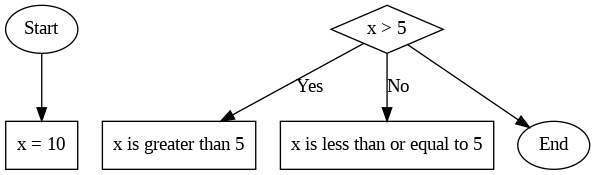

In [ ]:
import re
from graphviz import Digraph
from IPython.display import display, Image

# Define C++ code as a string
cpp_code = """
#include <iostream>

int main() {
    int x = 10;
    if (x > 5) {
        std::cout << "x is greater than 5" << std::endl;
    } else {
        std::cout << "x is less than or equal to 5" << std::endl;
    }
    return 0;
}
"""

def parse_cpp_code(cpp_code):
    """
    Parse the C++ code string and extract control flow information.
    Only include essential logic: assignments, conditions, and outputs.
    """
    control_flow = [("START", "Start")]  # Start node

    # Match variable assignments
    assign_pattern = re.compile(r'\b(\w+)\s*=\s*([^;]+);')
    for match in assign_pattern.finditer(cpp_code):
        control_flow.append(("ASSIGN", f"{match.group(1)} = {match.group(2)}"))

    # Match if statements
    if_pattern = re.compile(r'\bif\s*\((.*?)\)')
    for match in if_pattern.finditer(cpp_code):
        control_flow.append(("IF", match.group(1)))
        control_flow.append(("THEN", "x is greater than 5"))  # Add "Yes" branch
        control_flow.append(("ELSE", "x is less than or equal to 5"))  # Add "No" branch

    control_flow.append(("END", "End"))  # Add End node
    return control_flow

def generate_flowchart(control_flow, output_file="flowchart"):
    """
    Generate a flowchart from the control flow information.
    """
    dot = Digraph(comment='Flowchart', format='png')
    prev_node = None
    if_node = None  # Store IF node for branching

    for i, (node_type, node_name) in enumerate(control_flow):
        node_id = f"node_{i}"
        label = f"{node_name}"

        # Assign shape based on node type
        if node_type in ["START", "END"]:
            shape = "oval"
        elif node_type == "IF":
            shape = "diamond"
        else:
            shape = "box"

        dot.node(node_id, label, shape=shape)

        # Handle IF branching
        if node_type == "IF":
            if_node = node_id  # Store IF node
        elif node_type == "THEN":
            dot.edge(if_node, node_id, label="Yes")  # Connect Yes path
        elif node_type == "ELSE":
            dot.edge(if_node, node_id, label="No")  # Connect No path
        else:
            if prev_node:
                dot.edge(prev_node, node_id)

        prev_node = node_id if node_type not in ["THEN", "ELSE"] else prev_node

    # Render the flowchart
    dot.render(output_file, cleanup=True)
    print(f"Flowchart saved as {output_file}.png")

# Run the script
control_flow = parse_cpp_code(cpp_code)
generate_flowchart(control_flow)

# Display the generated image in Google Colab
display(Image(filename="flowchart.png"))


Flowchart saved as flowchart.png


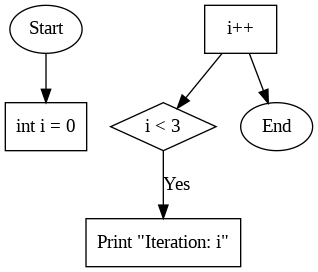

In [ ]:
import re
from graphviz import Digraph
from IPython.display import display, Image

cpp_code = """
int main() {
    for (int i = 0; i < 3; i++) {
        std::cout << "Iteration: " << i << std::endl;
    }
    return 0;
}
"""

def parse_cpp_code(cpp_code):
    """
    Parse the C++ code string and extract control flow information.
    """
    control_flow = [("START", "Start")]

    # Match for loops
    for_pattern = re.compile(r'\bfor\s*\((.*?)\)')
    match = for_pattern.search(cpp_code)
    if match:
        loop_parts = match.group(1).split(';')
        control_flow.append(("ASSIGN", loop_parts[0].strip()))  # Initialization
        control_flow.append(("FOR", loop_parts[1].strip()))  # Condition
        control_flow.append(("LOOP BODY", 'Print "Iteration: i"'))  # Loop body
        control_flow.append(("INCREMENT", loop_parts[2].strip()))  # Increment
        control_flow.append(("END", "End"))

    return control_flow

def generate_flowchart(control_flow, output_file="flowchart"):
    """
    Generate a flowchart from the control flow information.
    """
    dot = Digraph(comment='Flowchart', format='png')
    prev_node = None
    loop_node = None

    for i, (node_type, node_name) in enumerate(control_flow):
        node_id = f"node_{i}"
        label = f"{node_name}"

        shape = "oval" if node_type in ["START", "END"] else "diamond" if node_type == "FOR" else "box"
        dot.node(node_id, label, shape=shape)

        if node_type == "FOR":
            loop_node = node_id  # Store the condition node
        elif node_type == "LOOP BODY":
            dot.edge(loop_node, node_id, label="Yes")
        elif node_type == "INCREMENT":
            dot.edge(node_id, loop_node)  # Loop back to condition check
        else:
            if prev_node:
                dot.edge(prev_node, node_id)

        if node_type != "FOR":
            prev_node = node_id

    dot.render(output_file, cleanup=True)
    print(f"Flowchart saved as {output_file}.png")

# Run the script
control_flow = parse_cpp_code(cpp_code)
generate_flowchart(control_flow)

# Display the generated image in Google Colab
display(Image(filename="flowchart.png"))


Flowchart saved as flowchart.png


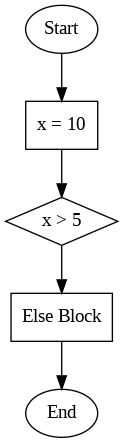

In [ ]:
import re
from graphviz import Digraph
from IPython.display import display, Image

# Sample C++ code to test
cpp_code = """
#include <iostream>

int main() {
    int x = 10;
    if (x > 5) {
        std::cout << "x is greater than 5" << std::endl;
    } else {
        std::cout << "x is less than or equal to 5" << std::endl;
    }
    return 0;
}

"""

def parse_cpp_code(cpp_code):
    """
    Parses C++ code and extracts control flow information
    """
    control_flow = [("START", "Start")]

    # Match variable assignments (e.g., int count = 0;)
    assign_pattern = re.compile(r'(\w+)\s+(\w+)\s*=\s*(.*?);')
    for match in assign_pattern.finditer(cpp_code):
        variable, value = match.group(2), match.group(3)
        control_flow.append(("ASSIGN", f"{variable} = {value}"))

    # Match if statements
    if_pattern = re.compile(r'\bif\s*\((.*?)\)')
    for match in if_pattern.finditer(cpp_code):
        control_flow.append(("IF", match.group(1)))

    # Match else statements
    else_pattern = re.compile(r'\belse\s*\{')
    for match in else_pattern.finditer(cpp_code):
        control_flow.append(("ELSE", "Else Block"))

    # Match for loops
    for_pattern = re.compile(r'\bfor\s*\((.*?);(.*?);(.*?)\)')
    for match in for_pattern.finditer(cpp_code):
        init, condition, increment = match.groups()
        control_flow.append(("ASSIGN", init.strip()))
        control_flow.append(("FOR", condition.strip()))
        control_flow.append(("UPDATE", increment.strip()))

    # Match while loops
    while_pattern = re.compile(r'\bwhile\s*\((.*?)\)')
    for match in while_pattern.finditer(cpp_code):
        control_flow.append(("WHILE", match.group(1)))

    # Match function calls (e.g., printMessage();)
    function_call_pattern = re.compile(r'(\w+)\s*\(.*?\);')
    for match in function_call_pattern.finditer(cpp_code):
        if match.group(1) not in ["if", "for", "while", "return"]:
            control_flow.append(("CALL", match.group(1)))

    control_flow.append(("END", "End"))
    return control_flow

def generate_flowchart(control_flow, output_file="flowchart"):
    """
    Generates a flowchart using Graphviz
    """
    dot = Digraph(comment='Flowchart', format='png')

    prev_nodes = []
    loop_start = None

    for i, (node_type, node_name) in enumerate(control_flow):
        node_id = f"node_{i}"
        shape = "box"

        # Define different shapes for different components
        if node_type == "START" or node_type == "END":
            shape = "ellipse"
        elif node_type in ["IF", "WHILE", "FOR"]:
            shape = "diamond"

        dot.node(node_id, node_name, shape=shape)

        if prev_nodes:
            if node_type == "END":
                dot.edge(prev_nodes[-1], node_id)
            elif node_type == "FOR" or node_type == "WHILE":
                loop_start = node_id
                dot.edge(prev_nodes[-1], node_id)
            elif node_type == "UPDATE" and loop_start:
                dot.edge(node_id, loop_start, label="Loop Back")
            else:
                dot.edge(prev_nodes[-1], node_id)

        prev_nodes.append(node_id)

    # Render the flowchart
    dot.render(output_file, cleanup=True)
    print(f"Flowchart saved as {output_file}.png")

# Run the script
control_flow = parse_cpp_code(cpp_code)
generate_flowchart(control_flow)

# Display the generated flowchart
display(Image(filename="flowchart.png"))


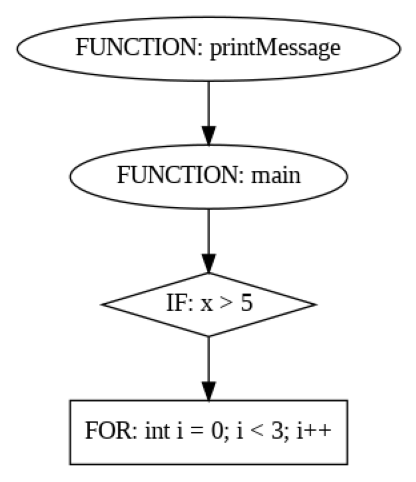

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_flowchart(image_path="flowchart.png"):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

# Call this function after generating the flowchart
display_flowchart()


Enter a description to generate a flowchart. Type 'exit' to quit.

Input: The car was repaired by the mechanic. Then, the car was driven by the owner to the service center.


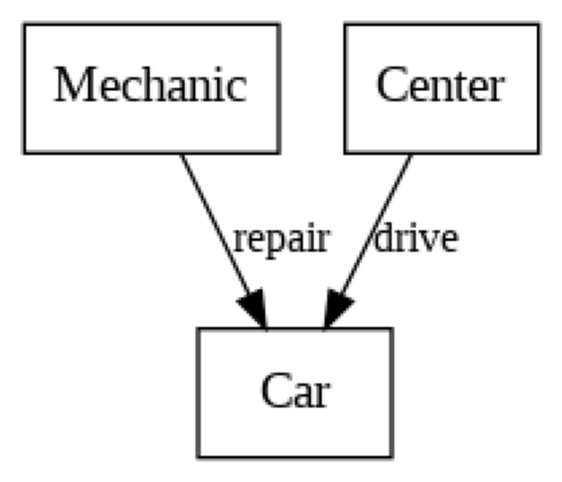

KeyboardInterrupt: Interrupted by user

In [ ]:
import spacy
import graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities_and_relationships(text):
    """
    Extracts subject-verb-object (SVO) relationships while handling passive voice correctly.
    """
    doc = nlp(text)
    entities = set()
    relationships = []

    for sent in doc.sents:
        subject = None
        verb = None
        obj = None
        is_passive = False  # Track passive sentences

        for token in sent:
            if token.dep_ == "ROOT" and token.pos_ == "VERB":
                verb = token.lemma_

            elif token.dep_ in ["nsubj", "nsubjpass"]:  # Subject (active/passive)
                subject = token.text.capitalize()
                if token.dep_ == "nsubjpass":
                    is_passive = True  # Mark sentence as passive

            elif token.dep_ in ["dobj", "attr", "pobj"]:  # Object
                obj = token.text.capitalize()

        # If passive, swap subject & object to maintain correct order
        if is_passive and subject and obj:
            subject, obj = obj, subject

        if subject and verb and obj:
            entities.add(subject)
            entities.add(obj)
            relationships.append({"source": subject, "target": obj, "label": verb})

    return list(entities), relationships

def generate_flowchart(entities, relationships, filename="flowchart"):
    """
    Generates a flowchart from extracted entities and relationships.
    """
    dot = graphviz.Digraph(format="png")

    for entity in entities:
        dot.node(entity, shape="rectangle", fontsize="14")

    for relation in relationships:
        dot.edge(relation["source"], relation["target"], label=relation["label"], fontsize="12")

    temp_filepath = filename + ".png"
    dot.render(filename, format="png")
    return temp_filepath

def display_flowchart(image_path):
    """
    Displays the generated flowchart in Colab.
    """
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

def main():
    """
    Runs the input loop to generate flowcharts dynamically.
    """
    print("Enter a description to generate a flowchart. Type 'exit' to quit.")

    while True:
        user_input = input("\nInput: ").strip()
        if user_input.lower() == "exit":
            print("Exiting... Goodbye!")
            break
        try:
            entities, relationships = extract_entities_and_relationships(user_input)
            if not entities or not relationships:
                print("No valid flowchart elements found. Try using clear subject-verb-object sentences.")
                continue

            image_path = generate_flowchart(entities, relationships)
            display_flowchart(image_path)

            os.remove(image_path)  # Clean up temp file

        except Exception as e:
            print(f"Error: {e}")

if __name__ == "__main__":
    main()
